In [1]:
from astropy import coordinates,units,constants
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [38]:
## load all satellite galaxies
data = ascii.read("./Drlica-Wagner2020.txt")

## let's calculate the angular size of these galaxies ---## oops they're actually in the column ah
distance=np.array(data['D'])## distance of these galaxies in kpc


### Crab pulsar let's say 1kJy for a reasonable example?
crabgp=1000*units.Jy 
crabgp=100*units.Jy ## 1.4 GHz based on -3.3 scale
crabgp=4.92e3*units.Jy ## 1kJy at 1.4 GHz 



crab=(7175*units.lightyear).to(units.kpc)
print (crab)
crab_pf=14*units.mJy.to(units.Jy)

vela_pf=1100*units.mJy.to(units.Jy)
vela=0.28*units.kpc

mockcrab=crabgp*(crab**2)/((distance*units.kpc)**2)
print('Crab GP at 10kpc:',crabgp*crab**2/(10*units.kpc)**2)

data.add_column(col=mockcrab,name='CrabGP')
print (data) ## if you want to have a look at the whole table

2.1998650004285607 kpc
Crab GP at 10kpc: 238.09877618943915 Jy
       Name       Survey Class  RAdeg   ... r1/2  VMag Ref       CrabGP      
                                 deg    ...  pc   mag              Jy        
----------------- ------ ----- -------- ... ---- ----- --- ------------------
        Antlia II     --     4 143.8868 ... 2301 -9.03   1 1.3664989450725389
      Aquarius II    PS1     4 338.4813 ...  125  -4.4   2  2.041313238935521
         Bootes I    PS1     4   210.02 ...  160 -6.02   3 5.4659957802901555
        Bootes II    PS1     4 209.5141 ...   33 -2.94   3 13.497663049287935
       Bootes III    PS1     4    209.3 ...  289 -5.75   4  10.77857746443817
        Bootes IV    PS1     3  233.689 ...  277 -4.53   5 0.5450854517740875
 Canes Venatici I    PS1     4 202.0091 ...  338  -8.8   3 0.5010074408497583
Canes Venatici II    PS1     4 194.2927 ...   55 -5.17   3 0.9300733444899967
           Carina     --     4 100.4065 ...  248 -9.43   3 2.1596260878860694
 

In [39]:
data['Name', "D",'CrabGP'][data["Name"]=='Sagittarius']


Name,D,col2
,kpc,Jy
str17,int64,float64
Sagittarius,26,35.221712454059045


In [40]:
hi_query=np.loadtxt('query.txt',dtype=str,delimiter='\t')[1:]
#name          halpha_mag      h1_21_cm_mag                log_h1_mass
logh1mass=hi_query.T[-1]


In [41]:
### filter parkes sample
##parkes dec -32.99839
pks_targets=data[(data['DEdeg']<(-32.99839+90-30.25))*(data['Class']==4)]
# print(pks_targets)
print(pks_targets['CrabGP'])
f=open("satellite gal names.txt",'w')
for i in pks_targets['RAdeg','DEdeg']:
    f.write(str(i[0])+" "+str(i[1])+"; ")
#     print(i[0],i[1])
f.close()

# for i in pks_targets:
#     print(i["CrabGP"])
print(hi_query[0][0])
pks_targets["Name"]==hi_query[0][0]

[ 1.36649895  2.04131324  5.46599578 13.49766305  2.15962609 18.37181915
 30.36974186 12.29849051  1.73934382  0.16488835  1.10185004  1.36649895
  3.81507413 30.36974186  9.52395105  0.36905384  0.43857646  1.00395841
  0.75147954  0.51508659  3.45621681  0.71881046 26.45541958 35.22171245
  5.00102449  3.37441576 45.00922045  3.21929119  6.19403684  7.07784709
 10.33414827] Jy
Bootes I


masked_BaseColumn(data=[False, False,  True, False, False, False, False,
                        False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False,
                        False, False, False],
                  mask=False,
            fill_value='N/A')

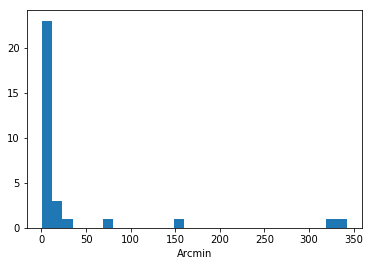

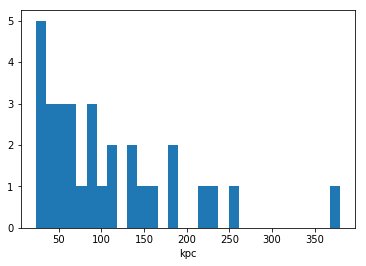

In [42]:
plt.hist(pks_targets['ah'],bins=30)
plt.xlabel("Arcmin")
plt.show()
plt.hist(pks_targets['D'],bins=30)
plt.xlabel("kpc")
plt.show()

In [43]:
###radiometer equation
def radiofunc(sigma,tsys,tsky,G,B,tobs):
    return (sigma*(tsys+tsky))/(G*np.sqrt(2*B*tobs))
### an sefd way of estimation
def sefd_rms(sigma,sefd,tobs,b):
    return (sefd/np.sqrt(tobs*b)*sigma)

tsky=2.5 ###kelvin


###parkes telescope UWL
pks_tsys=21
pks_g=1.8
#pks_sefd=29
pks_b=(4-0.7)*1e9 ###Hz

single_bw=pks_b/8192
tobs=0.001 ###width or integration time ##seconds
print("Parkes Radio Telescope UWL")
pks_sens=radiofunc(10,pks_tsys,tsky,pks_g,pks_b,tobs)
singlechan_sens=radiofunc(10,pks_tsys,tsky,pks_g,single_bw,tobs)

print(pks_sens,"Jy ms for single pulse total")
print(singlechan_sens, "Jy ms")

print("1 hour integration sensitivity",radiofunc(10,pks_tsys,tsky,pks_g,pks_b,3600) )

Parkes Radio Telescope UWL
0.05081868107721053 Jy ms for single pulse total
4.599581952083462 Jy ms
1 hour integration sensitivity 2.678379664828073e-05


one kilojansky pulse every 33.3924123 seconds
1.4 GHz flux 0.1538930516681145
1kJy 1.4 GHz flux- ---> translates to 6.498019170849886


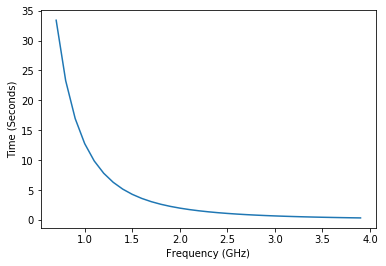

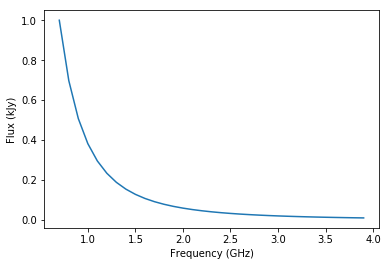

In [66]:
#Crab GP
#1 kJy ms pulse ~ 0.1% of all rotations
# crab period 0.0333924123 s

tobs_1p=0.0333924123/0.001
print ("one kilojansky pulse every",tobs_1p,"seconds")

plt.plot(np.arange(0.7,4,0.1),tobs_1p*(np.arange(0.7,4,0.1)/0.7)**(-2.7))
plt.ylabel("Time (Seconds)")

# plt.plot(np.arange(0.7,4,0.1),1*(np.arange(0.7,4,0.1)/0.7)**(-2.3))
# plt.ylabel("Flux Jy")
plt.xlabel("Frequency (GHz)")
plt.figure()
plt.plot(np.arange(0.7,4,0.1),1*(np.arange(0.7,4,0.1)/0.7)**(-2.7))
print ("1.4 GHz flux",1*2**(-2.7))
print ("1kJy 1.4 GHz flux- ---> translates to",1/2**(-2.7))

plt.xlabel("Frequency (GHz)")
plt.ylabel("Flux (kJy)")
plt.show()

In [45]:
###survey times in seconds

pmbs_time=2100
htru_time=4300
askap_t=10*3600 ##hrs
superb_t=560

utmost=9
#### craft-gp has 63.117 antenna_days
gp_total=63.117*24 ###hours
####parkes and ASKAP FOV
askap=22.9022104447
parkes=0.5558873668
palfa=0.01713858784 ##3.35 arcmin (3.35/2/60)^2*7*pi
gbt=0.03692682 ##13 arcmin (3.35/2/60)^2*7*pi
print("gbt fov is %.5f"%((13.01/2/60)**2*np.pi))
print("planned CRAFT-GP total FOV is %f deg $^2$"%(askap*160))
print("real CRAFT-GP total coverage is %f deg $^2$ hrs"%(askap*63.117*24))


##### log normal pulse stack distribution

def log_normal(sigma,mu,x):
    pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * (sigma**2)))/ (x * sigma * np.sqrt(2 * np.pi)))
    ##e^(-(log(x) - μ)^2/(2 σ^2))/(sqrt(2 π) σ x)
    return pdf

def gauss_normal(x):
    pdf=np.exp(-(x)**2/(2 * 1**2))/ (1 * np.sqrt(2 * np.pi))
    return pdf
print(log_normal(0.1,1.0,1))

gbt fov is 0.03693
planned CRAFT-GP total FOV is 3664.353671 deg $^2$
real CRAFT-GP total coverage is 34692.451599 deg $^2$ hrs
7.694598626706474e-22


17.62 3.6
0.3306227040223175


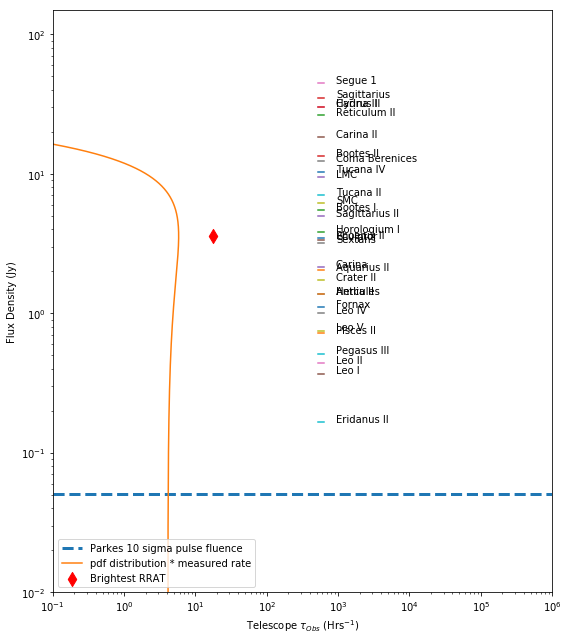

40


In [46]:
plt.figure(figsize=(8,9))
from scipy import signal
b_rate=np.loadtxt('../cat/b_rates')
b_wd=np.loadtxt('../cat/b_wd')
b_flux=np.loadtxt('../cat/b_rates_flux')

oc=b_rate#/3600
flux=b_flux/1000

max=np.where(flux==flux.max())[0][0]
###oc[max],flux[max]
###normalized energy value is
lgn_e=flux[max]
print(oc[max],lgn_e)

lgn_sig=0.15
lgn_mu=1.5

distr=np.arange(0.01,10,0.01)
#fluxx3=log_normal(lgn_sig,lgn_mu,5)
fdistr=log_normal(lgn_sig,lgn_mu,distr)
distr=np.arange(0.01,10,0.01)
distr2=np.arange(-3,3,0.01)

#fluxx3=log_normal(lgn_sig,lgn_mu,3)
fdistr=log_normal(lgn_sig,lgn_mu,distr)
g_noise=gauss_normal(distr2)


max=np.where(flux==flux.max())[0][0]



res=signal.convolve(fdistr, g_noise, mode='same') / sum(fdistr)
#print (distr2)
apos=np.where(res==res.max())
x_res=np.linspace(0,10,len(res))
dpos=x_res[apos]-1
x_res=x_res-dpos
#print(np.intersect1d(np.where(x_res>5),np.where(x_res<5.01)))
sig5pos=np.intersect1d(np.where(x_res>5),np.where(x_res<5.01))[0]
print(res.max())
#print(sum(fdistr*distr))
#print(fluxx3,fluxx3*oc[max])


plt.xscale('log')
plt.yscale('log')
plt.ylabel('Flux Density (Jy)')
plt.xlabel("Telescope $\\tau_{Obs}$ (Hrs$^{-1}$)")


crab_rate=1/(tobs_1p*(1.4/0.7)**(-2.3))*3600
# plt.plot([crab_rate,crab_rate],[1e-2,1000],label='rate at 1.4GHz crab 1kJy GP')
k=200
for i in pks_targets:
    plt.plot([crab_rate-10,crab_rate+100],[i["CrabGP"].value,i["CrabGP"].value])
    plt.annotate(i["Name"],(crab_rate+2*k,i["CrabGP"].value))
    
plt.plot([1e-1,1e6],[pks_sens,pks_sens],'--',c='C0',linewidth=3,label="Parkes 10 sigma pulse fluence")
plt.scatter(oc[max],flux[max],s=100,marker="d",c='red',label='Brightest RRAT')
#plt.plot(oc[max]*fdistr,flux[max]*distr)
plt.plot(oc[max]*res,flux[max]*x_res,label="pdf distribution * measured rate")
plt.xlim(1e-1,1e6)
plt.ylim(1e-2,1.5e2)
#plt.grid(True)
plt.legend(loc=3)
plt.tight_layout()
plt.savefig("rrat_space.pdf")
plt.show()
#print(pmbs_y)
print(len(oc))

In [64]:
for name in pks_targets["Name"]:
    print (name)
    mask=pks_targets["Name"]==name
#     print (pks_targets[mask]["ah","e"])
    a=pks_targets[mask]["ah"][0]
    e=pks_targets[mask]["e"][0]
    b=np.sqrt(a**2*(1-e**2))
    print ('a value',a)
    print ('b value',b)
    print ("pointings needed",a/6,' x ',b/6,' = ', np.round(a/6+1)*np.round(b/6+1))

Antlia II
a value 76.2
b value 70.4839702627484
pointings needed 12.700000000000001  x  11.747328377124733  =  182.0
Aquarius II
a value 5.1
b value 4.696155768285375
pointings needed 0.85  x  0.7826926280475625  =  4.0
Bootes I
a value 9.97
b value 9.51077383812695
pointings needed 1.6616666666666668  x  1.5851289730211582  =  9.0
Bootes II
a value 3.17
b value 3.0693393018693778
pointings needed 0.5283333333333333  x  0.511556550311563  =  4.0
Carina
a value 10.1
b value 9.422818262070006
pointings needed 1.6833333333333333  x  1.570469710345001  =  9.0
Carina II
a value 8.69
b value 8.17229703571768
pointings needed 1.4483333333333333  x  1.3620495059529467  =  4.0
Carina III
a value 3.75
b value 3.1318674540918874
pointings needed 0.625  x  0.5219779090153146  =  4.0
Coma Berenices
a value 5.64
b value 5.239739092741164
pointings needed 0.94  x  0.873289848790194  =  4.0
Crater II
a value 31.2
b value 31.04360803772654
pointings needed 5.2  x  5.173934672954423  =  36.0
Eridanus II

In [ ]:
#LeoIV 